In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
orig = pd.read_csv('User Knowledge.csv')

In [3]:
orig

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24
...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89
399,0.85,0.82,0.66,0.83,0.83
400,0.56,0.60,0.77,0.13,0.32
401,0.66,0.68,0.81,0.57,0.57


In [17]:
# Convert 'Cluster' into labels for confusion matrix demonstration
def add_labels():
    label_encoder = LabelEncoder()
    orig['Cluster_Label'] = label_encoder.fit_transform(orig['PEG'] > 0.5)


In [18]:
# Plot 1: Histogram of 'STG'
def plot_histogram():
    plt.figure(figsize=(8, 5))
    plt.hist(orig['STG'], bins=5, color='skyblue', edgecolor='black')
    plt.title('Histogram of STG')
    plt.xlabel('STG Values')
    plt.ylabel('Frequency')
    plt.show()


In [42]:
# Plot 2: Scatter plot of 'LPR' vs. 'PEG'
def plot_scatter():
    plt.figure(figsize=(8, 5))
    plt.scatter(orig['LPR'], orig['PEG'], color='darkorange', edgecolor='black', alpha=0.7, s=100)
    plt.title('Scatter Plot of LPR vs PEG', fontsize=16)
    plt.xlabel('LPR', fontsize=14)
    plt.ylabel('PEG', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

In [20]:
# Plot 3: Heatmap of the dataset correlation
def plot_heatmap():
    plt.figure(figsize=(10, 6))
    correlation = orig.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

In [21]:
# Plot 4: Elbow plot for KMeans clustering
def plot_elbow():
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(orig)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, 'bx-')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

In [47]:
# Clustering: KMeans and Silhouette Score
def plot_kmeans_with_centroids():
    plt.figure(figsize=(8, 5))
    # Plotting scatter plot with color clusters
    scatter = plt.scatter(orig['LPR'], orig['PEG'], c=clusters, cmap='viridis', edgecolor='k', s=100, alpha=0.7)

   # Plotting the centroids of the clusters
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids', edgecolor='black')

    # Adding titles and labels
    plt.title('K-Means Clustering with Cluster Centers', fontsize=16)
    plt.xlabel('LPR', fontsize=14)
    plt.ylabel('PEG', fontsize=14)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.colorbar(scatter, label='Cluster')
    plt.show()

In [44]:
def line_fitting():
    X = orig[['LPR']]
    y = orig['PEG']
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)

    plt.figure(figsize=(8, 5))
    # Plot actual data points
    plt.scatter(X, y, color='blue', label='Actual', edgecolor='black', s=100, alpha=0.7)

    # Plot fitted line
    plt.plot(X, predictions, color='red', linewidth=2, label='Fitted Line')

    # Adding titles and labels
    plt.title('Linear Regression: LPR vs PEG', fontsize=16)
    plt.xlabel('LPR', fontsize=14)
    plt.ylabel('PEG', fontsize=14)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

In [28]:
# Plot 5: Confusion Matrix
def plot_confusion_matrix():
    # Simulate a binary classification problem for demonstration purposes
    y_true = orig['Cluster_Label']
    y_pred = (orig['PEG'] > 0.5).astype(int)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


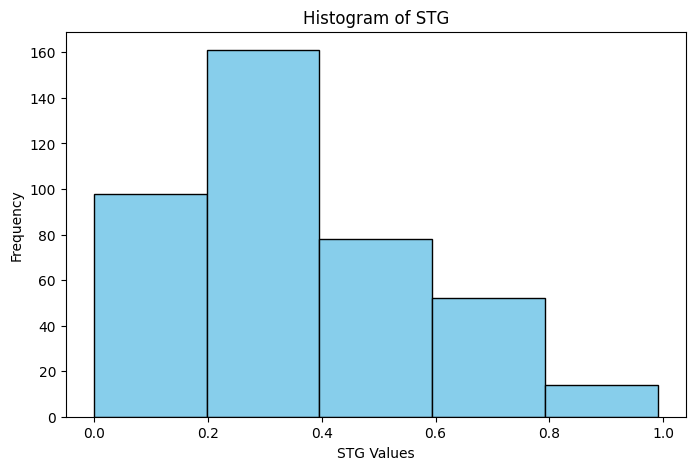

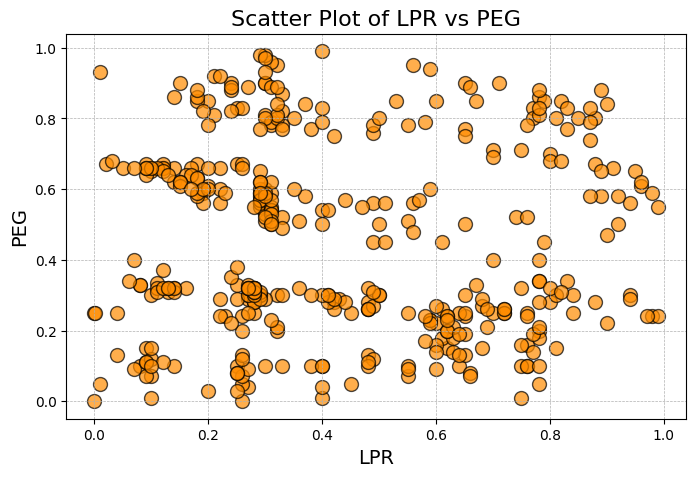

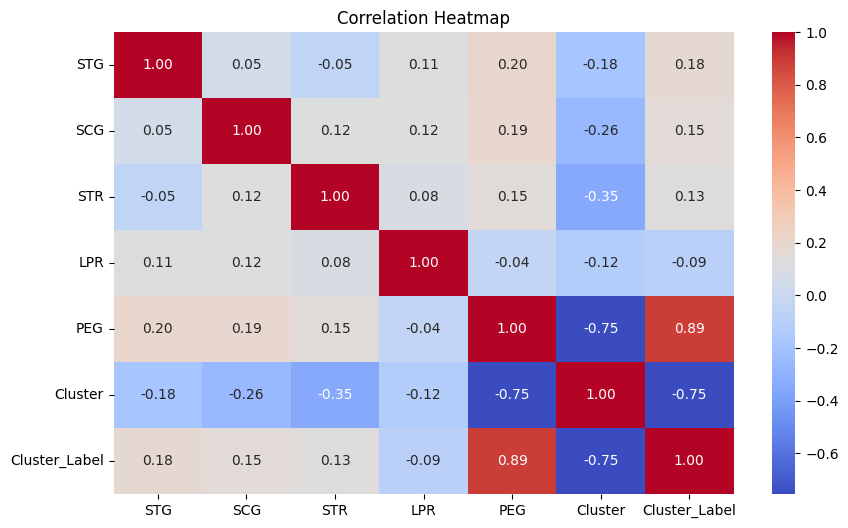

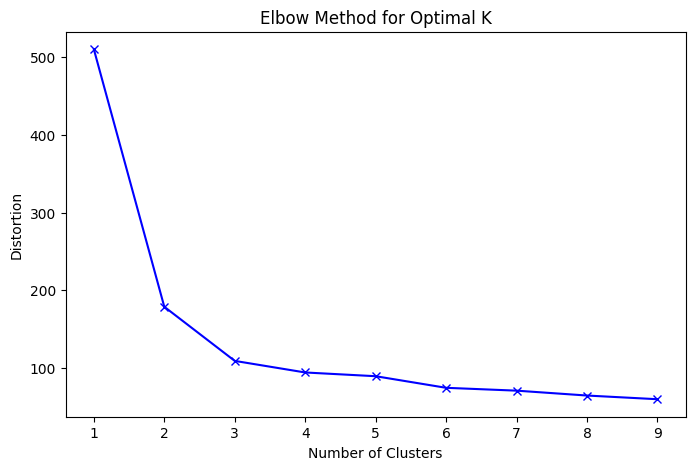

Silhouette Score: 0.52


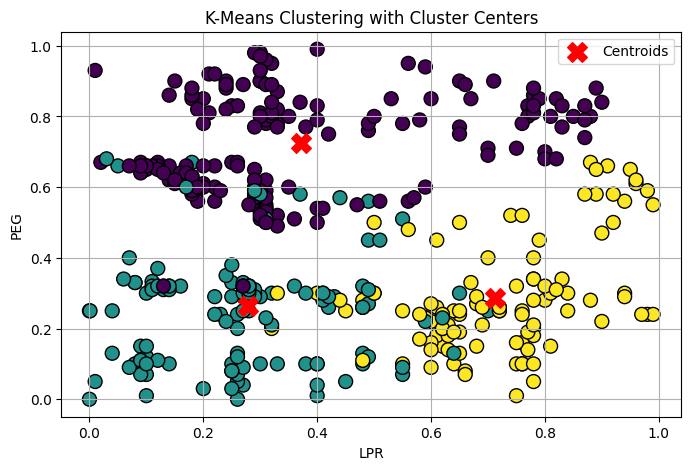

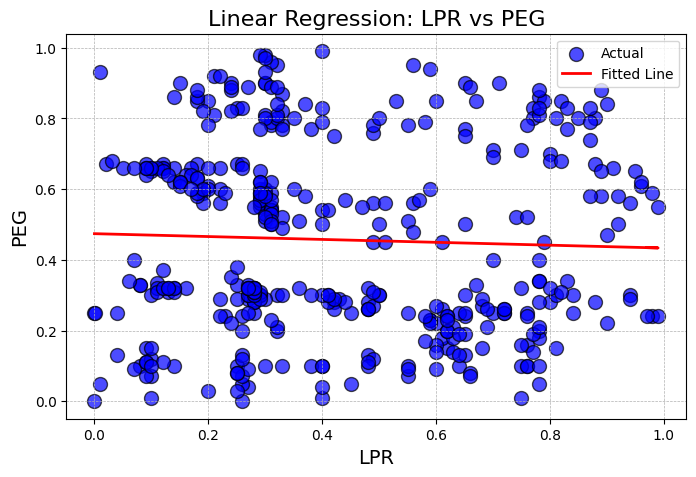

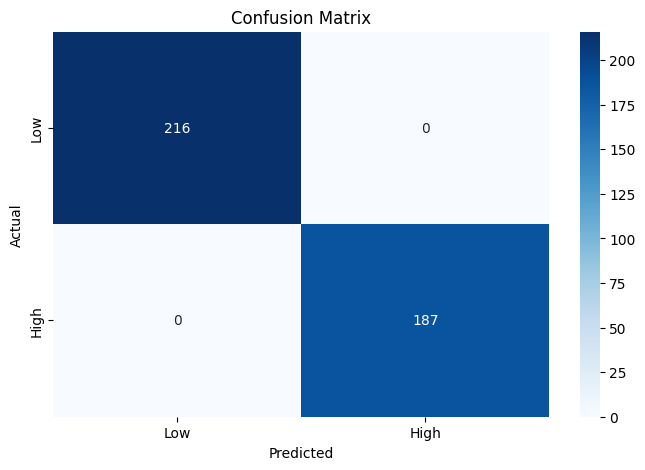

In [48]:
# Function calls
add_labels()
plot_histogram()
plot_scatter()
plot_heatmap()
plot_elbow()
kmeans_clustering()
line_fitting()
plot_confusion_matrix()
